In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [87]:
from PIL import Image
import matplotlib.pyplot as plt
from pathlib import Path

# 데이터 불러오기
image_dir = Path('/content/drive/MyDrive/archive (5)/images/images')

# 이미지 파일들의 경로를 가져오기
jpg_files = sorted(Path(image_dir).glob('*.jpg'))
png_files = sorted(Path(image_dir).glob('*.png'))

image_paths= []
# jpg 파일들의 경로를 이미 있는 image_paths에 추가
for jpg_file in jpg_files:
    image_paths.append(jpg_file)

# png 파일들의 경로를 이미 있는 image_paths에 추가
for png_file in png_files:
    image_paths.append(png_file)

# 이미지 파일들의 경로를 합치기
image_files = image_paths

In [88]:
import numpy as np
from PIL import Image
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.preprocessing import image
from keras.models import Model

In [89]:
class FeatureExtractor:
    def __init__(self):
        # Use VGG-16 as the architecture and ImageNet for the weight
        base_model = VGG16(weights='imagenet')
        # Customize the model to return features from fully-connected layer
        self.model = Model(inputs=base_model.input, outputs=base_model.get_layer('fc1').output)
    def extract(self, img):
        # Resize the image
        img = img.resize((224, 224))
        # Convert the image color space
        img = img.convert('RGB')
        # Reformat the image
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)
        # Extract Features
        feature = self.model.predict(x)[0]
        return feature / np.linalg.norm(feature)

In [90]:
fe = FeatureExtractor()

In [91]:
import glob

# jpg, png 모두 가져와서 image_files 저장
image_files = glob.glob('/content/drive/MyDrive/archive (5)/images/images/*.jpg') + glob.glob('/content/drive/MyDrive/archive (5)/images/images/*.png')

# image_feature 담는 리스트 생성
image_feature = []

# 각 이미지의 특징 벡터 추출하고 저장하기
for file in image_files:
    try:
        # 이미지 불러오기
        img = Image.open(file)

        # 이미지의 특징 벡터 추출
        feature = fe.extract(img)

        # feature 파일 생성
        feature_path = f"/content/drive/MyDrive/features/{file.split('/')[-1][:-4]}.npy"

        # 특징 벡터를 Numpy 배열로 저장
        np.save(feature_path, feature)

       # 특징 벡터를 리스트에 추가
        image_feature.append(feature)
    except Exception as e:
        print(f'예외가 발생했습니다: {e}')

1/1 [==============================] - 1s 603ms/step


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


1/1 [==============================] - 1s 618ms/step
[array([0.00820347, 0.00267397, 0.03780925, ..., 0.        , 0.        ,
       0.        ], dtype=float32), array([0.        , 0.00730625, 0.00920908, ..., 0.01756196, 0.        ,
       0.05147415], dtype=float32), array([0.        , 0.00420717, 0.01000392, ..., 0.02655256, 0.        ,
       0.04765972], dtype=float32), array([0.00900702, 0.00200847, 0.        , ..., 0.01706547, 0.        ,
       0.02865584], dtype=float32), array([0.        , 0.0223556 , 0.03489131, ..., 0.00957168, 0.        ,
       0.        ], dtype=float32), array([0.02390133, 0.        , 0.00637084, ..., 0.02117516, 0.        ,
       0.04924958], dtype=float32), array([0.        , 0.0001492 , 0.03331219, ..., 0.00245033, 0.        ,
       0.01442166], dtype=float32), array([0.00727958, 0.        , 0.02775669, ..., 0.        , 0.        ,
       0.03661584], dtype=float32), array([0.        , 0.02167995, 0.        , ..., 0.00983658, 0.        ,
       0.0

1/1 [==============================] - 1s 614ms/step


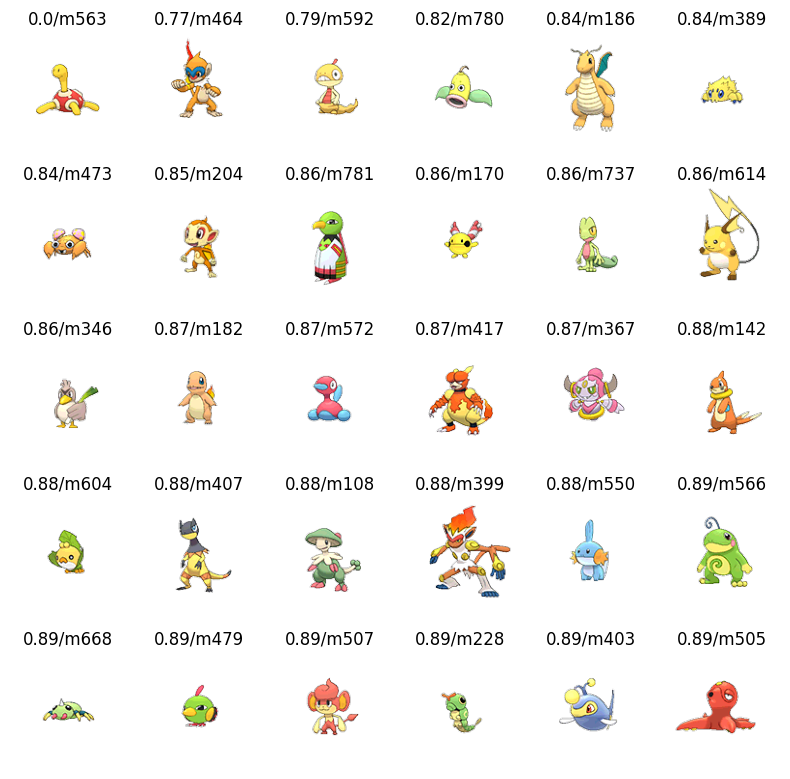

In [119]:
# 타겟 이미지 설정
img_ = Image.open("/content/drive/MyDrive/archive (5)/images/images/shuckle.png")

# Extract its features
query = fe.extract(img_)

# 이미지 간 유사도(거리) 측정
dists = np.linalg.norm(np.array(image_feature) - query, axis=1)

# 상위 유사도(낮은 거리) 30개 추출
ids = np.argsort(dists)[:30]

scores = [(dists[id], image_files[id], id) for id in ids]

# 결과 시각화
axes=[]
fig=plt.figure(figsize=(8,8))
for a in range(5*6):
    score = scores[a]
    axes.append(fig.add_subplot(5, 6, a+1))
    subplot_title=str(round(score[0],2)) + "/m" + str(score[2]+1)
    axes[-1].set_title(subplot_title)
    plt.axis('off')
    plt.imshow(Image.open(score[1]))
fig.tight_layout()
plt.show()